# ***MATERI***

---

**Regresi** adalah salah satu ***metode statistik yang digunakan untuk memprediksi nilai suatu variabel dependen (tergantung) berdasarkan variabel independen (bebas)***. Tujuan utama dari regresi adalah untuk membangun sebuah model yang menggambarkan hubungan antara dua atau lebih variabel sehingga kita bisa membuat prediksi.


Ada berbagai jenis regresi, tetapi yang paling umum adalah regresi linier dan regresi logistik:

- **Regresi Linier**: Memprediksi nilai kontinu, misalnya, prediksi harga rumah berdasarkan fitur-fitur seperti luas tanah, jumlah kamar tidur, dll.

- **Regresi Logistik**: Digunakan untuk prediksi variabel biner (ya/tidak, benar/salah), contohnya, memprediksi apakah seorang pasien sakit atau tidak berdasarkan gejala yang ada.


Dalam logistic regression, variabel dependen (sering disebut target variable atau output variable) adalah variabel yang ingin diprediksi atau dijelaskan oleh model.Pada regresi logistik, variabel dependen harus bersifat biner atau kategorikal. Artinya, ia memiliki dua nilai yang saling eksklusif, seperti:
- Ya atau Tidak
- 0 atau 1
- Positif atau Negatif


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/PWDK_JCDSA_1080/CAPSTONE 2 PURWADIKA/df_dup (1).csv')

## *LOGISTIC REGGRESION*

---



- Logistic Regression digunakan untuk memodelkan hubungan antara variabel independen (fitur) dengan variabel dependen biner (0 atau 1). Algoritma ini sangat efektif dalam masalah klasifikasi biner seperti **prediksi** apakah email itu spam atau tidak, atau apakah seorang pasien memiliki penyakit tertentu.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc

In [ ]:
df.isnull().sum()

,0
id,0
name,8
host_id,0
host_name,1
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


In [ ]:
# Memilih fitur dan target variabel
X = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'distance_km']]
y = df['city_zone']

# Mengatasi variabel target yang kategorikal (Pusat/Pinggiran)
le = LabelEncoder()
y = le.fit_transform(y)  # Mengubah kategori menjadi 0 dan 1

# Pembagian data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred = log_reg_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Akurasi: 94.48%
Confusion Matrix:
[[1159   93]
 [  82 1837]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1252
           1       0.95      0.96      0.95      1919

    accuracy                           0.94      3171
   macro avg       0.94      0.94      0.94      3171
weighted avg       0.94      0.94      0.94      3171



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


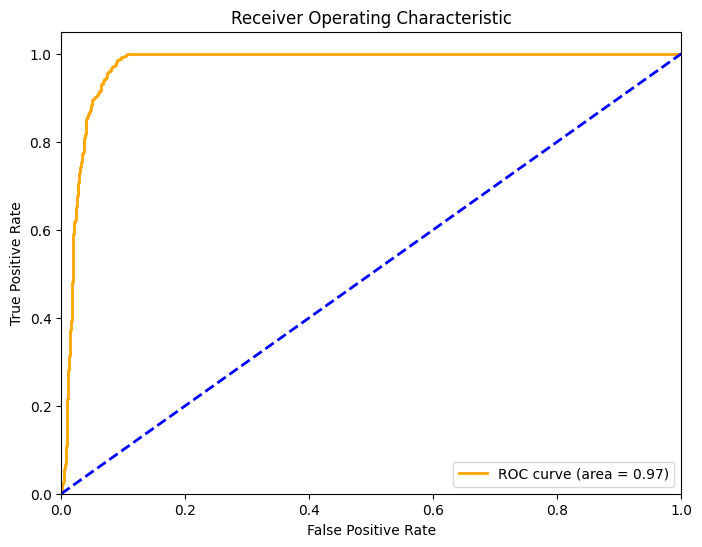

In [ ]:
# Menghitung probabilitas prediksi dari model (bukan hanya kelas)
y_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Menghitung nilai ROC dan AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Membuat visualisasi ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

kurva ROC menunjukkan nilai AUC (Area Under the Curve) yang sangat tinggi, yaitu sekitar 0.97. Hal ini menunjukkan bahwa model tersebut memiliki kemampuan klasifikasi yang sangat baik

## *KNN*
---




- KNN digunakan untuk klasifikasi atau regresi, tetapi paling sering digunakan dalam klasifikasi. Algoritma ini bekerja dengan cara mengklasifikasikan titik data baru berdasarkan mayoritas label dari K tetangga terdekatnya.

SYARAT:
- Non-parametrik: KNN tidak membuat asumsi tentang bentuk distribusi data, jadi sangat fleksibel.

- Distance Metric: KNN mengandalkan metrik jarak seperti Euclidean, Manhattan, atau Minkowski untuk menentukan kedekatan antara data.

- Pemilihan K yang Tepat: Nilai K yang terlalu kecil bisa membuat model menjadi sangat sensitif terhadap noise, sementara K yang terlalu besar bisa menghaluskan keputusan.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Memilih fitur dan target variabel
X = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'distance_km']]
y = df['city_zone']

# Mengatasi variabel target yang kategorikal (Pusat/Pinggiran)
le = LabelEncoder()
y = le.fit_transform(y)  # Mengubah kategori menjadi 0 dan 1

# Pembagian data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membangun model KNN dengan k = 5 (misalnya)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Akurasi KNN: 83.32%




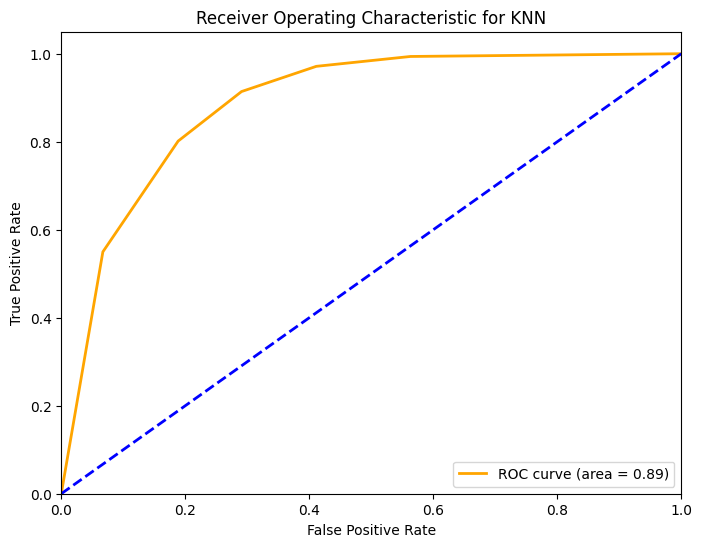

In [ ]:
#Prediksi dengan data pengujian
y_pred = knn_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi KNN: {accuracy * 100:.2f}%")
print("\n")

# Menghitung probabilitas prediksi untuk ROC curve
y_prob = knn_model.predict_proba(X_test)[:, 1]

# Menghitung nilai ROC dan AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Visualisasi ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc='lower right')
plt.show()

Ini berarti model dapat mengklasifikasikan data uji dengan tingkat keberhasilan sekitar 83%. Akurasi ini cukup baik, tetapi bukan hasil yang sangat luar biasa, mengingat bahwa dalam beberapa kasus kita bisa mendapatkan akurasi yang lebih tinggi dengan pemilihan model yang lebih baik atau tuning parameter lebih lanjut.

## *DECISION TREE*
---

- Decision Tree digunakan untuk klasifikasi dan regresi. Algoritma ini membagi data menjadi beberapa subset berdasarkan fitur yang paling relevan dalam memisahkan kelas (atau nilai). Ini menghasilkan model berbentuk pohon dengan cabang-cabang yang mewakili keputusan dan daun yang mewakili hasil.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Memilih fitur dan target variabel
X = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'distance_km']]
y = df['city_zone']

# Mengatasi variabel target yang kategorikal (Pusat/Pinggiran)
le = LabelEncoder()
y = le.fit_transform(y)  # Mengubah kategori menjadi 0 dan 1

# Pembagian data menjadi data pelatihan dan pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Membangun model Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Akurasi Decision Tree: 99.97%




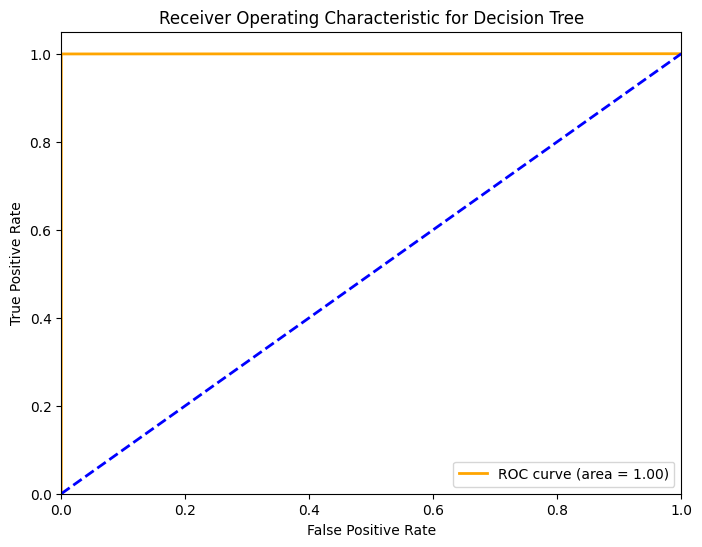

In [ ]:
# Prediksi dengan data pengujian
y_pred = decision_tree_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Decision Tree: {accuracy * 100:.2f}%")
print("\n")

# Menghitung probabilitas prediksi untuk ROC curve
y_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Menghitung nilai ROC dan AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Visualisasi ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc='lower right')
plt.show()

Akurasi yang Sangat Tinggi (99.97%):

Akurasi sebesar ini menunjukkan bahwa model hampir sempurna dalam mengklasifikasikan data uji. Model ini dapat mengklasifikasikan hampir semua data dengan benar.

Namun, hasil ini sangat tinggi dibandingkan dengan model sebelumnya (KNN dengan akurasi 83.32%). Jika akurasi ini jauh lebih tinggi dari yang diharapkan, ada kemungkinan overfitting pada model, di mana model "terlalu cocok" dengan data pelatihan sehingga tidak dapat menangani data uji yang lebih umum.

# ***Rekomendasi Model untuk Data Ini:***
- KNN adalah model yang paling seimbang dan cukup efektif dengan AUC 0.89 dan akurasi 83.32%. Meskipun tidak sebaik Decision Tree dalam hal AUC, KNN memberikan kinerja yang solid tanpa kemungkinan overfitting yang sangat tinggi. KNN juga lebih robust untuk data yang mungkin memiliki noise atau fitur yang tidak terlalu relevan.

- Decision Tree memiliki hasil yang luar biasa, tetapi ada kemungkinan overfitting dan data leakage, sehingga hasil yang sangat baik mungkin tidak dapat digeneralisasi ke data yang lebih besar atau lebih kompleks. Sebaiknya, Anda perlu memperbaiki model Decision Tree dengan menggunakan pruning dan validasi silang untuk memastikan kestabilan model.